In [1]:
import tensorflow as tf

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

## working on MNIST dataset


This dataset contains handwritten digits.
It has 10 classes i.e. 0 to 9
Each data point is 2D array of 28x28 size.
Also known as hello world dataset for ANN



[Image source](https://en.wikipedia.org/wiki/MNIST_database#/media/File:MnistExamples.png)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
mnist = tf.keras.datasets.mnist

In [6]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [7]:
X_train_full.shape

(60000, 28, 28)

In [8]:
y_train_full.shape

(60000,)

In [9]:
X_train_full.dtype

dtype('uint8')

uint8 (unsigned integer) = 2 raise to 8

In [10]:
### scaling

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:]/255.

In [11]:
y_valid, y_train = y_train_full[:5000] , y_train_full[5000:]

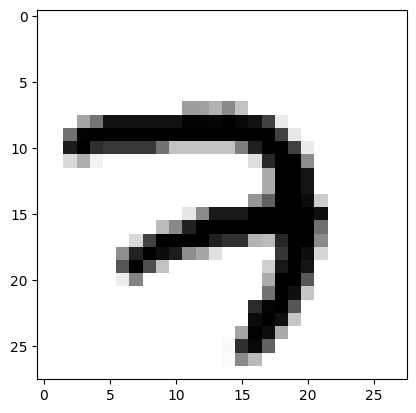

In [12]:
plt.imshow(X_train[0], cmap='binary')

(-0.5, 27.5, 27.5, -0.5)

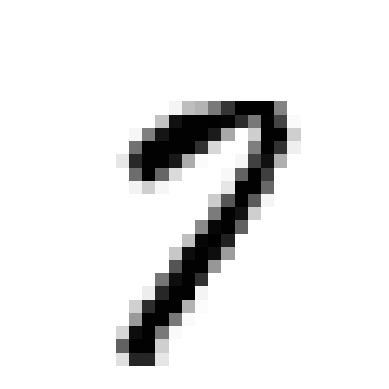

In [13]:
plt.imshow(X_train[4999], cmap='binary')
plt.axis('off')

(-0.5, 27.5, 27.5, -0.5)

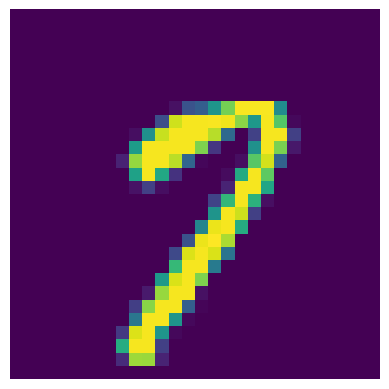

In [14]:
plt.imshow(X_train[4999])
plt.axis('off')

<Axes: >

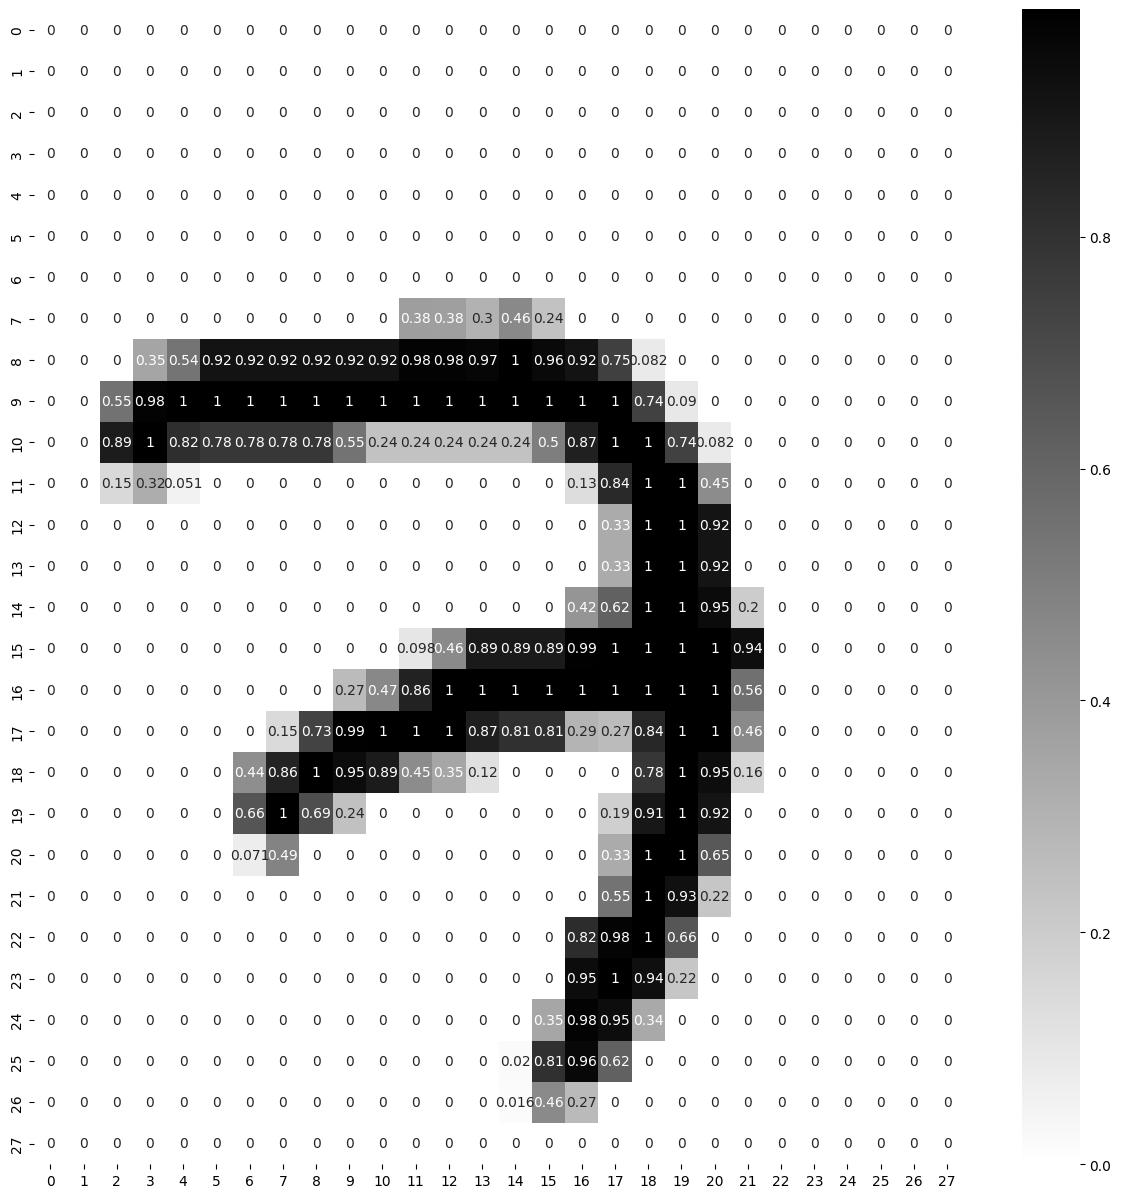

In [15]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot= True, cmap='binary')

<Axes: >

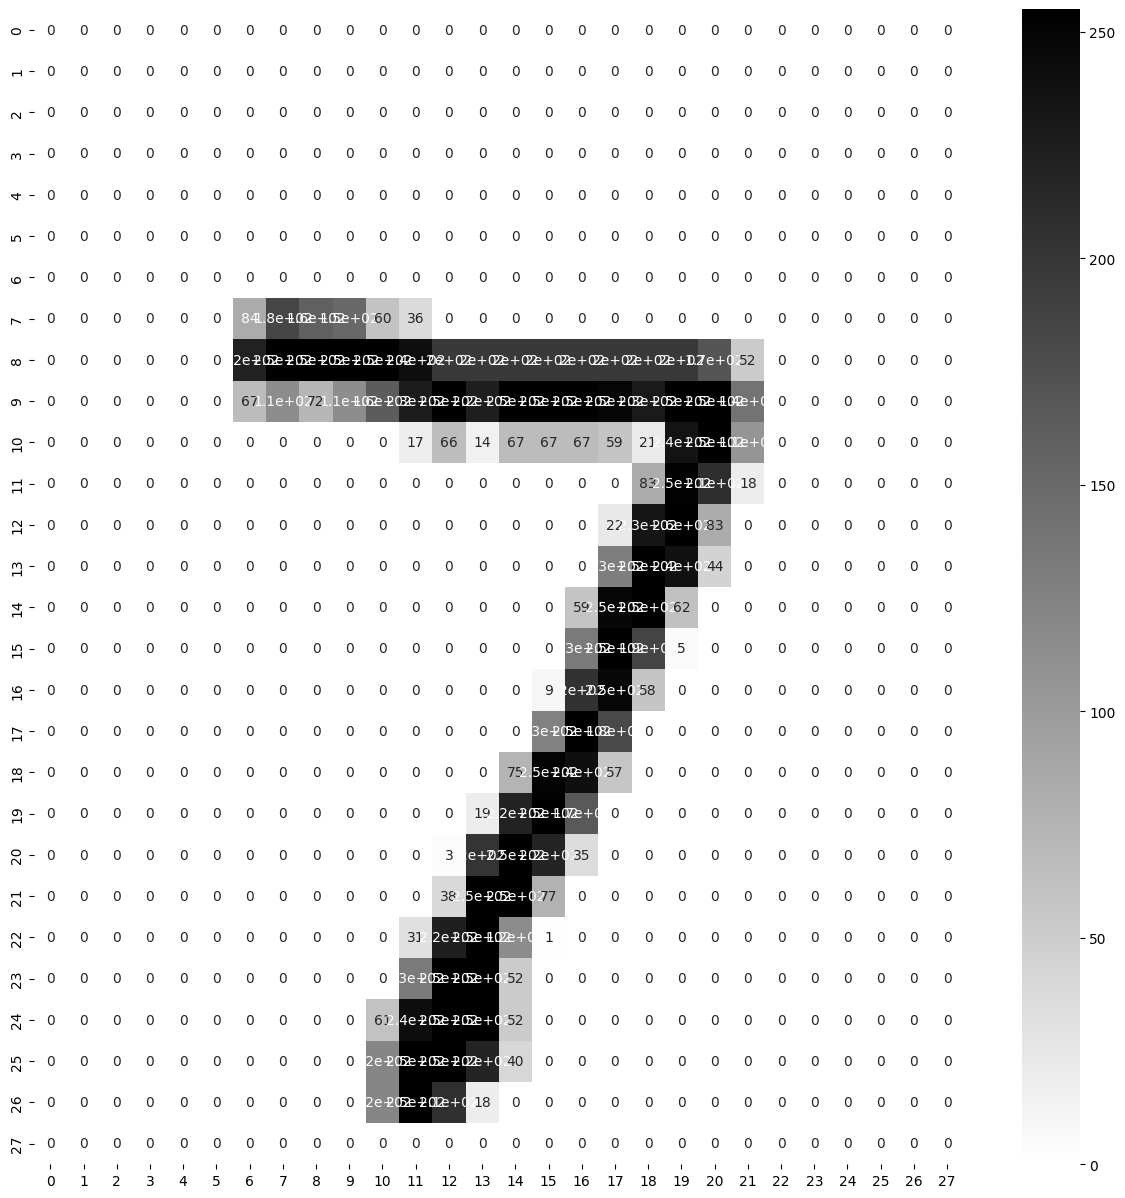

In [16]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(X_test[0], annot= True, cmap='binary')

In [17]:
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model_clf = tf.keras.models.Sequential(LAYERS)

In [18]:
model_clf.layers

In [19]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
784 * 300 + 300

235500

In [21]:
300 * 100 + 100

30100

In [22]:
100 * 10 + 10

1010

In [23]:
235500 + 30100 + 1010

266610

In [24]:
hidden1 = model_clf.layers[1]
hidden1

In [25]:
model_clf.get_layer(hidden1.name) is hidden1

True

In [26]:
hidden1.set_weights(hidden1.get_weights())

In [27]:
type(hidden1.get_weights())


list

In [28]:
hidden1.get_weights()

[array([[-0.00236499,  0.0243919 ,  0.02622017, ..., -0.00311631,
          0.01749461,  0.05997215],
        [ 0.03856967,  0.02388223, -0.02317458, ...,  0.03561612,
          0.03383735,  0.07304308],
        [-0.06850065,  0.0248813 , -0.01803569, ...,  0.01826429,
          0.04944982,  0.06558417],
        ...,
        [ 0.00780971, -0.0698955 , -0.02490547, ..., -0.01372607,
          0.05410676,  0.06165113],
        [-0.06759933,  0.00631622, -0.04572065, ..., -0.00217842,
         -0.0644739 , -0.02712515],
        [ 0.01505722,  0.05516417,  0.03011795, ...,  0.02110434,
          0.0081998 , -0.07258356]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [29]:
weights, biases = hidden1.get_weights()

In [30]:
weights

array([[-0.00236499,  0.0243919 ,  0.02622017, ..., -0.00311631,
         0.01749461,  0.05997215],
       [ 0.03856967,  0.02388223, -0.02317458, ...,  0.03561612,
         0.03383735,  0.07304308],
       [-0.06850065,  0.0248813 , -0.01803569, ...,  0.01826429,
         0.04944982,  0.06558417],
       ...,
       [ 0.00780971, -0.0698955 , -0.02490547, ..., -0.01372607,
         0.05410676,  0.06165113],
       [-0.06759933,  0.00631622, -0.04572065, ..., -0.00217842,
        -0.0644739 , -0.02712515],
       [ 0.01505722,  0.05516417,  0.03011795, ...,  0.02110434,
         0.0081998 , -0.07258356]], dtype=float32)

In [31]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [32]:
LOSS_FUNCTION = 'sparse_categorical_crossentropy'
OPTIMIZER = 'SGD'
METRICS = ['accuracy']

model_clf.compile(loss = LOSS_FUNCTION,
                  optimizer= OPTIMIZER,
                  metrics = METRICS)

In [33]:
EPOCHS = 30
VALIDATION_SET =(X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs= EPOCHS,
                        validation_data = VALIDATION_SET)

Epoch 1/30
1719/1719 [==============================] - 8s 3ms/step - loss: 0.5939 - accuracy: 0.8454 - val_loss: 0.3178 - val_accuracy: 0.9098
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2949 - accuracy: 0.9150 - val_loss: 0.2483 - val_accuracy: 0.9316
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2410 - accuracy: 0.9304 - val_loss: 0.2088 - val_accuracy: 0.9414
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2055 - accuracy: 0.9411 - val_loss: 0.1848 - val_accuracy: 0.9502
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1783 - accuracy: 0.9489 - val_loss: 0.1656 - val_accuracy: 0.9542
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1581 - accuracy: 0.9547 - val_loss: 0.1509 - val_accuracy: 0.9586
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1419 - accuracy: 0.9597 - val_loss: 0.1371 - val_accuracy:

In [34]:
import time
import os

def saveModel_path(model_dir="SAVED_MODELS"):
    os.makedirs(model_dir, exist_ok=True)
    fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")
    model_path = os.path.join(model_dir, fileName)
    print(f"your model will be saved at the following location\n{model_path}")
    return model_path


In [35]:
UNIQUE_PATH = model_clf.save(saveModel_path())

your model will be saved at the following location
SAVED_MODELS/Model_2024_01_25_09_22_37_.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [36]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [38]:
history_score = pd.DataFrame(history.history)

In [39]:
history_score

,loss,accuracy,val_loss,val_accuracy
0,0.593858,0.845400,0.317811,0.9098
1,0.294861,0.915000,0.248336,0.9316
2,0.240977,0.930382,0.208752,0.9414
3,0.205466,0.941127,0.184816,0.9502
4,0.178308,0.948873,0.165641,0.9542
5,0.158135,0.954655,0.150944,0.9586
6,0.141881,0.959673,0.137142,0.9614
7,0.128358,0.963255,0.127244,0.9658
8,0.116992,0.966709,0.120561,0.9674
9,0.107482,0.969345,0.111047,0.9688


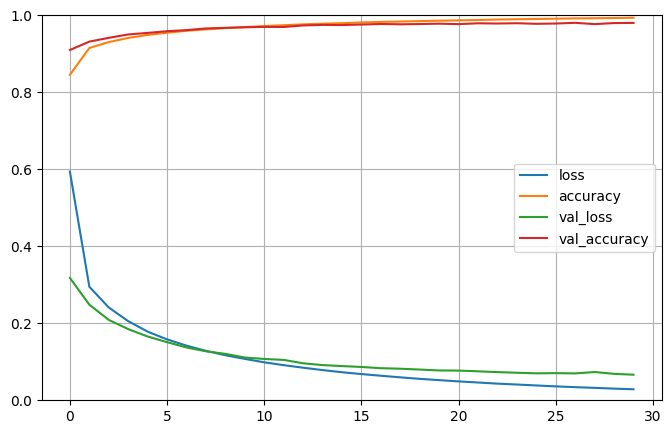

In [41]:
history_score.plot(figsize = (8,5))

plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [42]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 13.3640 - accuracy: 0.9751


[13.363973617553711, 0.9750999808311462]

In [47]:
X_new = X_test[:3]

y_prob = model_clf.predict(X_new)

y_prob

#y_prob.round(3)

1/1 [==============================] - 0s 26ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [48]:
y_pred = np.argmax(y_prob, axis=-1)
y_pred

array([7, 2, 1])

axis =-1 (it says only give me prediction for each rows present in the matrix)

In [50]:
y_test_new = y_test[:3]
y_test_new

array([7, 2, 1], dtype=uint8)

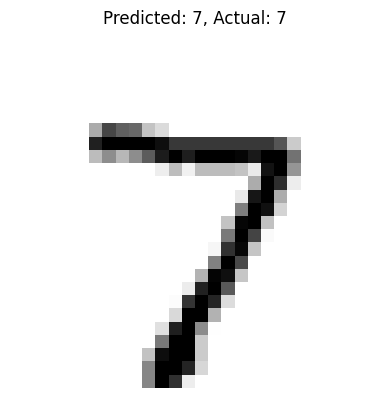

------------------------------------------------------------


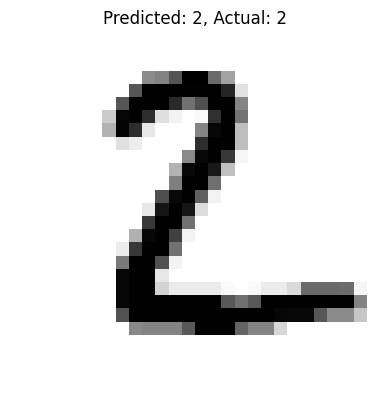

------------------------------------------------------------


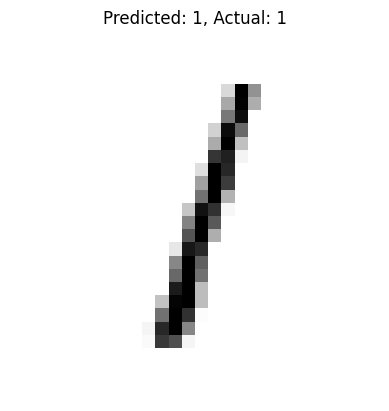

------------------------------------------------------------


In [51]:
for data, pred, actual in zip(X_new, y_pred, y_test_new):
    plt.imshow(data, cmap="binary")
    plt.title(f"Predicted: {pred}, Actual: {actual}")
    plt.axis('off')
    plt.show()
    print("---"*20)